In [55]:
# Load Imports
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt


import os
import re
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils import *
from data_generator import DataGenerator


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
### Load packages ###
import matplotlib.pyplot as plt
from scipy import stats
import nibabel as nib
import numpy as np
import os

### Aux. Functions ###
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
      axes[i].imshow(slice.T, cmap="gray", origin="lower")

def show_slice(slice):
    plt.imshow(slice.T, cmap="gray", origin="lower")
    
def normalizeImg(x):
    # Normalize x
    max_val = np.max(x)
    min_val = np.min(x)
    norm_x = (x-min_val)/(max_val-min_val + 1e-7)
    return norm_x

def thresholdMask(mask, threshold=0.56):
    mask[mask >= threshold] = 1.0
    mask[mask < threshold] = 0.0
    return mask






In [51]:
# Data path
data_fp = '../data/'
# Params for generators
params = {'dim': (256,256,256),
          'batch_size': 1,
          'n_channels': 1,
          'shuffle' : True}

## Load side data ##
(x_train, y_train, _, _, _, _) =load_partitioned_data(data_fp, split=(5, 5, 90))



In [60]:
# Test the training_generator 
training_generator = DataGenerator(x_train, y_train, **params)

print('Number of img(s) in training generator ', len(training_generator))
for img in training_generator:
    if training_generator.index > len(training_generator):
        break
    print('img: ', training_generator.index)
    print('name : ', (img[2])[training_generator.index-1])
    print(img[0].shape)
    '''
    input_slice = (img[0][0,:, :, :])[:, :, 75]    
    show_slice(input_slice)
    plt.show()
    mask_slice = (img[1][0,:, :, :])[:, :, 75]    
    show_slice(mask_slice)
    plt.show()
    '''


Number of img(s) in training generator  29
img:  1
name :  ../data//IXI535-Guys-1061-T1.nii.gz
(1, 256, 256, 256)
img:  2


IndexError: list index out of range

(75, 256, 256, 1)
(75, 256, 256, 1)


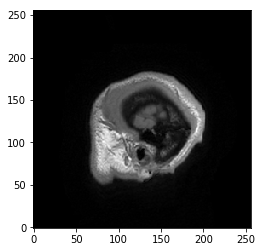

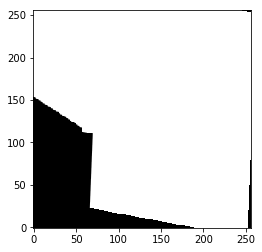

In [53]:
### Test Flip_Index Function to make sure images have proper orientation ###
from train import flip_index, get_slice_batch

training_generator = DataGenerator(x_train, y_train, **params)
batch_size = 75
slice_type = 'side'

for data in training_generator: 
    if training_generator.index > 1:
        break
     # Set input & output masks
    input_img = (data[0])[0,:,:,:]
    output_mask = (data[1])[0,:,:,:]
    # Prepare aux. vars. for iter. train on batch
    T, B, S = input_img.shape
    # Number of batches is invariant to dim.
    num_batches = int(np.ceil(S/batch_size))
    # Batch of side slices
    side_slice_batch_x = None
    side_slice_batch_y = None
    # Loss & Dice array
    loss = []
    dice = []
    # Train on each batch
    for batch_num in range(0, num_batches):
        s_idx = batch_num*batch_size
        # Check if last batch
        if batch_num == (num_batches-1):
            f_idx = None 
        else:
            f_idx = s_idx + batch_size
            #print(s_idx, f_idx) 
        side_slice_batch_x = get_slice_batch(input_img,
                                            slice_type,
                                            s_idx, f_idx)
        side_slice_batch_y= get_slice_batch(output_mask,
                                            slice_type,
                                            s_idx, f_idx)

        # Flip axes to make index to iterate over first 
        side_slice_batch_x = flip_index(side_slice_batch_x, slice_type=slice_type)
        side_slice_batch_y = flip_index(side_slice_batch_y, slice_type=slice_type)
        # Plot the sliced image
        print(side_slice_batch_x.shape)
        print(side_slice_batch_y.shape)
        show_slice(side_slice_batch_x[-1, :, :, 0])
        plt.show()
        show_slice(side_slice_batch_y[-1, :, :, 0])
        plt.show()
        break
        